In [29]:
import pandas as pd
df = pd.read_csv("your_data.csv")
df.head()


,Unnamed: 0,eyesight(left),systolic,serum creatinine,triglyceride,Cholesterol,AST,height(cm),waist(cm),age,LDL,smoking
0,0,0.5,135,1.0,300,172,22,165,81.0,55,75,1
1,1,0.6,146,1.1,55,194,27,165,89.0,70,126,0
2,2,0.4,118,0.8,197,178,27,170,81.0,20,93,1
3,3,1.5,131,1.0,203,180,20,180,105.0,35,102,0
4,4,1.5,121,0.8,87,155,19,165,80.5,30,93,1


In [25]:
X = df.drop("smoking",axis="columns")
y = df["smoking"]
y

0         1
1         0
2         1
3         0
4         1
         ..
159251    0
159252    0
159253    0
159254    1
159255    0
Name: smoking, Length: 159256, dtype: int64

In [11]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
# X_scaled[:3]

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3,random_state=10)

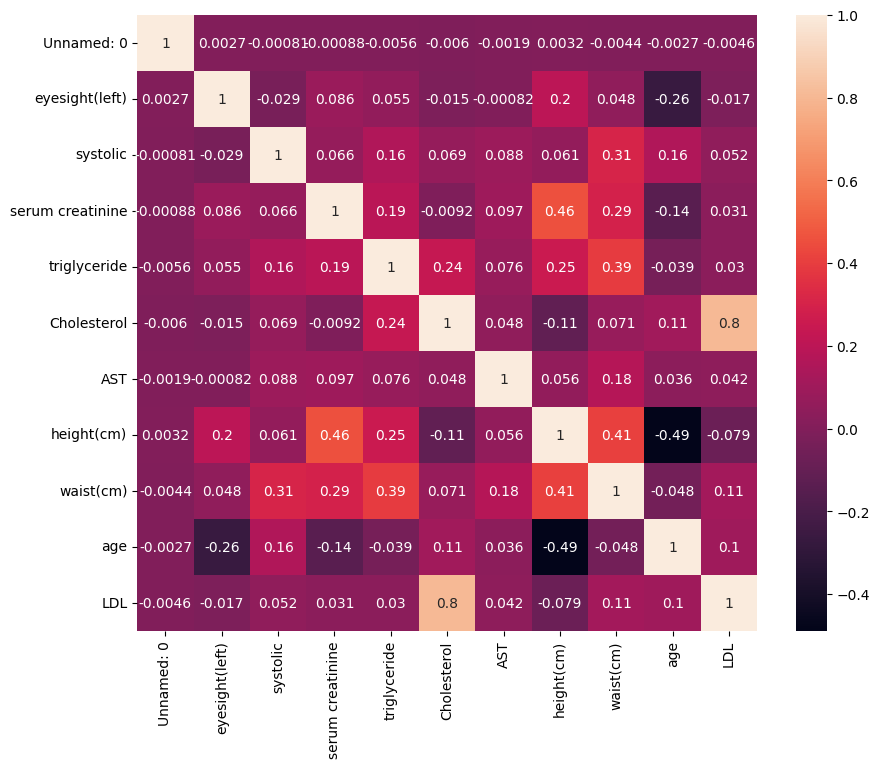

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(X_train.corr(),annot=True)
plt.show()

In [28]:
def correlation(dataset,threshols):
    col_corr = set()
    corr_matrix  = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j])>threshols:
                col_corr.add(corr_matrix.columns[i])
    return col_corr  
corr_features = correlation(X_train,0.75)          
len(set(corr_features))

1

In [22]:
corr_features

{'LDL'}

In [23]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,Unnamed: 0,eyesight(left),systolic,serum creatinine,triglyceride,Cholesterol,AST,height(cm),waist(cm),age
124811,124811,0.7,90,0.8,59,152,22,160,75.0,45
86981,86981,1.0,120,0.8,148,179,19,165,79.0,35
18269,18269,1.0,120,0.9,126,195,35,170,87.0,40
133585,133585,0.9,104,1.4,97,159,21,170,90.5,70
139355,139355,1.2,142,1.0,114,213,40,170,81.0,40
...,...,...,...,...,...,...,...,...,...,...
8000,8000,1.0,123,0.9,75,231,30,180,69.0,40
157922,157922,1.0,139,0.7,67,225,28,155,90.0,60
67315,67315,1.0,100,0.7,66,180,50,145,79.0,60
89471,89471,1.0,122,0.9,243,194,24,170,87.0,35
